In [2]:
import numpy as np
import sys

from keras.models import load_model
from progressbar import ProgressBar

module_path = '/home/diplomski-rad/consensus-net/src/python/utils/'
if module_path not in sys.path:
    print('Adding utils module.')
    sys.path.append(module_path)

import visualization

Adding utils module.


# Validation dataset

## Load data

In [3]:
X_validate, y_validate = np.load('./dataset-n20-X-validate.npy'), np.load('./dataset-n20-y-validate.npy')

In [2]:
# # Reshaping because of old model congifuration mor models 7 and 11.
# new_X = list()
# num_data = X_validate.shape[0]
# num_columns = X_validate[0].shape[1]
# neighbourhood_size = X_validate[0].shape[0]
# with ProgressBar(max_value=num_data) as progress_bar:
#     for i, xi in enumerate(X_validate):
#         new_xi = np.dstack(
#             [xi[:, col_index].reshape(neighbourhood_size, 1)
#              for col_index in range(num_columns)]
#         )
#         new_X.append(new_xi)
#         progress_bar.update(i)

# new_X = np.array(new_X)
# X_validate_old = new_X

In [3]:
print(X_validate.shape)
print(y_validate.shape)

(3109078, 41, 5)
(3109078, 6)


## Helper functions

In [4]:
def generate_predictions(probabilities):
    predictions = np.zeros(probabilities.shape)
    predictions[np.arange(probabilities.shape[0]), np.argmax(probabilities, axis=1)] = 1
    return predictions

## Investigate model 11

In [11]:
model = load_model('./model-11.h5')

probabilities = model.predict(X_validate)
predictions = generate_predictions(probabilities)

#### Visualize random incorrect

perm [1398364]


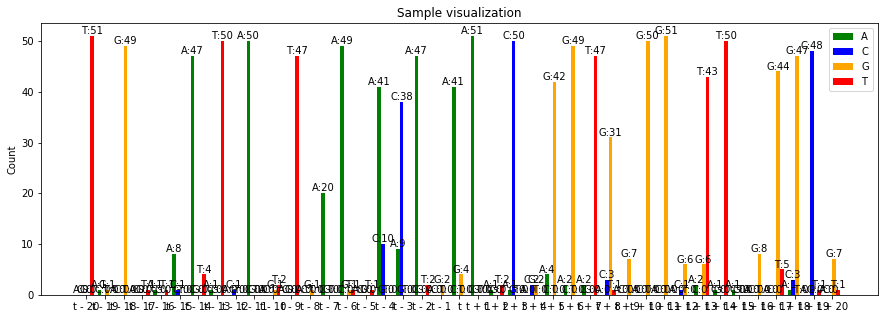

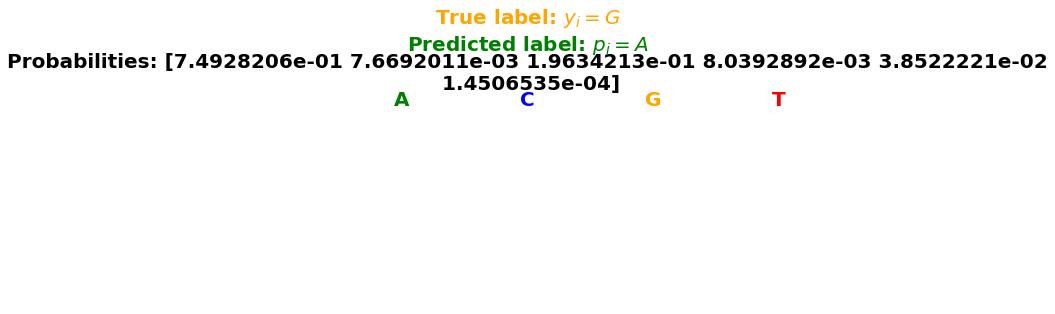

In [19]:
num_display = 1
correct_indices = np.where(np.any(predictions != y_validate, axis=1))[0]
permuted_correct_indices = np.random.permutation(correct_indices)[:num_display]
print('perm', permuted_correct_indices)

counter = 0
for xi, yi, prob_i, pred_i in zip(X_validate[permuted_correct_indices], y_validate[permuted_correct_indices], probabilities[permuted_correct_indices], predictions[permuted_correct_indices]):
    visualization.visualize_sample(xi, yi, prob_i, pred_i)

## Investigate model 15

In [5]:
model = load_model('./model-15.h5')

probabilities = model.predict(X_validate)
predictions = generate_predictions(probabilities)

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


### Visualize random incorrect

perm [454209]


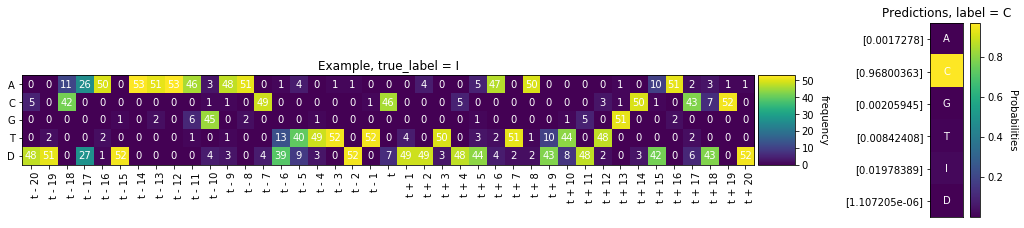

In [6]:
num_display = 1
incorrect_indices = np.where(np.any(predictions != y_validate, axis=1))[0]
permuted_incorrect_indices = np.random.permutation(incorrect_indices)[:num_display]
print('perm', permuted_incorrect_indices)

counter = 0
for xi, yi, prob_i, pred_i in zip(X_validate[permuted_incorrect_indices], y_validate[permuted_incorrect_indices], probabilities[permuted_incorrect_indices], predictions[permuted_incorrect_indices]):
    visualization.visualize_prediction(xi, yi, prob_i, pred_i)

### Visualize random correct

perm [1354956]


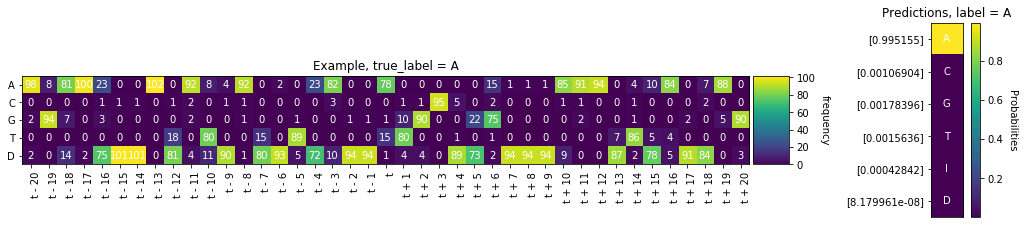

In [7]:
num_display = 1
correct_indices = np.where(np.all(predictions == y_validate, axis=1))[0]
permuted_correct_indices = np.random.permutation(correct_indices)[:num_display]
print('perm', permuted_correct_indices)

counter = 0
for xi, yi, prob_i, pred_i in zip(X_validate[permuted_correct_indices], y_validate[permuted_correct_indices], probabilities[permuted_correct_indices], predictions[permuted_correct_indices]):
    visualization.visualize_prediction(xi, yi, prob_i, pred_i)

### Inspect incorrect predictions

Total number of data: 32250
Number of A: 6055
Number of C: 5883
Number of G: 5947
Number of T: 5736
Number of I: 7926
Number of D: 703


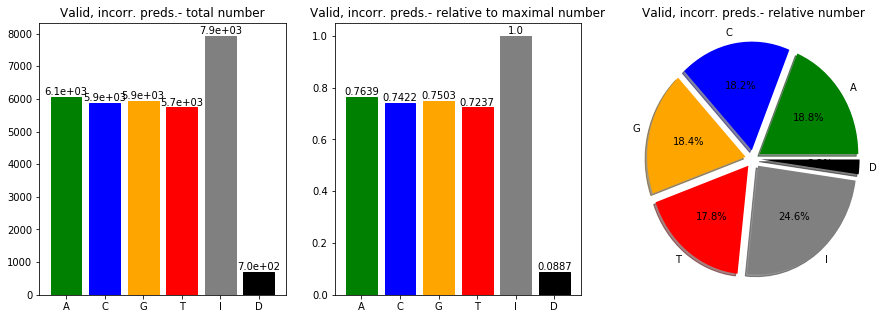

In [8]:
incorrect_indices = np.where(np.any(predictions != y_validate, axis=1))[0]
visualization.dataset_classes_summary(predictions[incorrect_indices], 'Valid, incorr. preds.')

### Inspect correct predictions

Total number of data: 3076828
Number of A: 394122
Number of C: 427364
Number of G: 425682
Number of T: 394077
Number of I: 1434299
Number of D: 1284


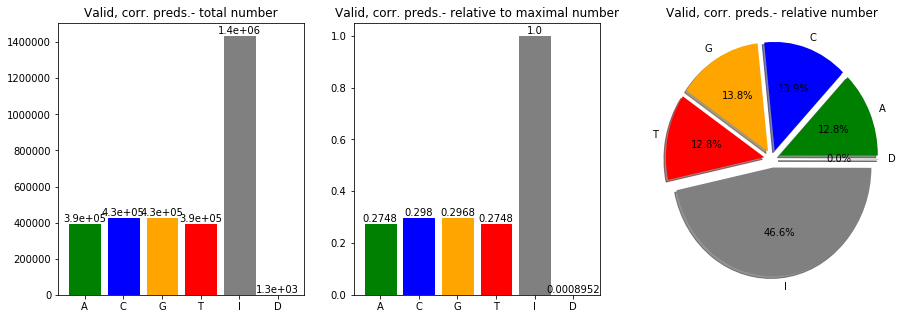

In [9]:
correct_indices = np.where(np.all(predictions == y_validate, axis=1))[0]
visualization.dataset_classes_summary(predictions[correct_indices], 'Valid, corr. preds.')

### Macro measure

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision_M:', precision_score(y_validate, predictions, average='macro'))
print('Recall_M:', recall_score(y_validate, predictions, average='macro'))
print('F1_M', f1_score(y_validate, predictions, average='macro'))

Precision_M: 0.930645036628328
Recall_M: 0.8573281047213029
F1_M 0.8739817360219084


### Micro measure

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision_u:', precision_score(y_validate, predictions, average='micro'))
print('Recall_u:', recall_score(y_validate, predictions, average='micro'))
print('F1_u', f1_score(y_validate, predictions, average='micro'))

Precision_u: 0.9896271499138973
Recall_u: 0.9896271499138973
F1_u 0.9896271499138973


### Inspect incorrect predictions: class A

In [25]:
class_A = np.array([1, 0, 0, 0, 0, 0])
y_validate_class_A_indices = np.where(np.all(y_validate == class_A, axis=1))[0]

num_correct_A = np.where(np.all(y_validate[y_validate_class_A_indices] == predictions[y_validate_class_A_indices], axis=1))[0].shape[0]
print(num_correct_A, y_validate_class_A_indices.shape[0])

394122 398946


### Confusion matrix

Confusion matrix, without normalization
[[ 394122     722    2988     605    1734       6]
 [    677  427364     559    2900    1738       9]
 [   2883     526  425682     738    1789      11]
 [    574    2847     720  394077    1588       7]
 [    655     682     563     807 1434299    5219]
 [     35      47      38      64     519    1284]]


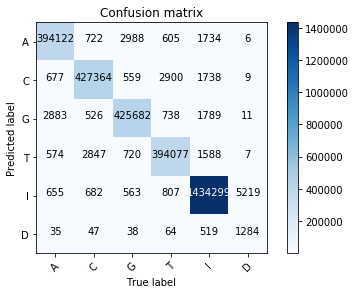

In [48]:
cm = confusion_matrix(np.argmax(y_validate, axis=1), np.argmax(predictions,axis=1)).T
plot_confusion_matrix(cm, classes=['A', 'C', 'G', 'T', 'I', 'D'])

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_validate, predictions, target_names=['A', 'C', 'G', 'T', 'I', 'D'], digits=5))

             precision    recall  f1-score   support

          A    0.98487   0.98791   0.98639    398946
          C    0.98642   0.98884   0.98763    432188
          G    0.98622   0.98869   0.98746    430550
          T    0.98565   0.98719   0.98642    399191
          I    0.99450   0.99489   0.99470   1441667
          D    0.64620   0.19645   0.30130      6536

avg / total    0.98913   0.98963   0.98912   3109078

